In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from import_casa import casa
from casa import Cadet

In [236]:
cadet = Cadet.load(casa.get_data_path()/"cadet/op20")
cadet

[INFO] 2021-04-26 16:45:11,124 gensim.utils: loading KeyedVectors object from E:\LangOn\casa\data\cadet\op20\ft-2020.kv
[INFO] 2021-04-26 16:45:12,667 gensim.utils: setting ignored attribute vectors_norm to None
[INFO] 2021-04-26 16:45:12,668 gensim.utils: setting ignored attribute vectors_vocab_norm to None
[INFO] 2021-04-26 16:45:12,669 gensim.utils: setting ignored attribute vectors_ngrams_norm to None
[INFO] 2021-04-26 16:45:12,671 gensim.utils: setting ignored attribute buckets_word to None
[INFO] 2021-04-26 16:45:12,815 gensim.utils: FastTextKeyedVectors lifecycle event {'fname': 'E:\\LangOn\\casa\\data\\cadet\\op20\\ft-2020.kv', 'datetime': '2021-04-26T16:45:12.815153', 'gensim': '4.0.0', 'python': '3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020, 23:03:10) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18362-SP0', 'event': 'loaded'}
[WARNING] 2021-04-26 16:45:12,824 gensim.models.keyedvectors: destructive init_sims(replace=True) deprecated & no longer required for space-eff

<Cadet: FastText(9851, 200), Seeds(103)>

In [7]:
import umap
import hdbscan
import numpy as np
import numpy.linalg as la

sp_vecs = cadet.kv.vectors
sp_vecs = sp_vecs / la.norm(sp_vecs, axis=1)[:, np.newaxis]

In [9]:
sp_proj = umap.UMAP(metric="cosine").fit_transform(sp_vecs)

In [19]:
hdb = hdbscan.HDBSCAN(min_cluster_size=50)
hdb.fit(sp_proj)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=50, min_samples=None, p=None,
        prediction_data=False)

Text(0.5, 1.0, 'EDA Visualization')

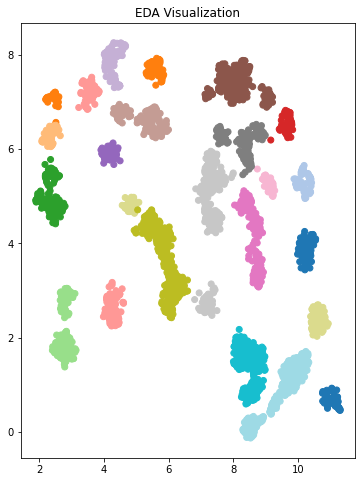

In [50]:
import matplotlib.pyplot as plt
mask = hdb.labels_>=0
fig, ax = plt.subplots(1, 1, figsize=(6,8))
plt.scatter(sp_proj[:, 0][mask], sp_proj[:, 1][mask], c=hdb.labels_[mask], cmap="tab20")
plt.title("EDA Visualization")

In [69]:
from collections import Counter
print(Counter(hdb.labels_).most_common(40))

[(-1, 5927), (23, 369), (28, 353), (26, 296), (15, 244), (7, 224), (21, 220), (6, 207), (20, 182), (16, 147), (25, 136), (17, 131), (13, 125), (27, 119), (10, 111), (1, 94), (8, 88), (3, 86), (11, 86), (9, 84), (0, 79), (18, 72), (14, 65), (5, 62), (24, 61), (12, 60), (2, 59), (4, 57), (19, 55), (22, 52)]


In [109]:
print(Counter(hdb.labels_[np.logical_and(sp_proj[:, 0] <4, sp_proj[:, 1] <6)]).most_common(40))

[(-1, 665), (7, 224), (6, 207), (8, 88), (12, 7), (10, 1)]


In [112]:
vocab = cadet.kv.index_to_key
clust_id = 6
sp_idxs = [x for x in range(len(vocab)) if hdb.labels_[x]==clust_id]
sps = [vocab[x] for x in sorted(sp_idxs, key=lambda i: -hdb.probabilities_[i])]
sps = [x for x in sps if len(x)>=1]
print(sps)

['28', '75', '[emo', '49', 'xx', '78', '56', '110', '0.', 'hn20ki', '32', ';=', '52', '58', '09', '67', 'hn20kk', '54', '44', '.9', '08', '.5', 'hn20kj', '.3', '64', 'hq20ki', '73', 'hq20kk', '發表於', '74', '53', '43', 'hn', '85', '86', '}', '6-', '84', '2:', 'hq20k', 'hq', '燦', '謂', 'hn20k', '愷', '蓮', '脂', '崑', '鞘', '鷗', '1080', '.0', '浏览', '55', '琪', '抑', '1090', '6666', '98', '1:', '87', '7.', '66', '抒', '48', '代碼', '34', '0.0', '45', '47', '57', '🏾', '35', '27', '46', '6.', '扳', '-0', '0', '33', '89', '109/0', '38', '36', '悍', '69', '扼', '77', '39', '59', '5.', '37', 'pm', '76', '4.', '79', '慚', '.', '4-', '.8', '26', '24', '9', '42', '担', '٩', '51', '醣', '20k', '22', '108', '2', '19', '14', '4', '哦!', '杰', '16', '7', '6', '29', '疵', 'ś', '⟡', '睦', '擂', '朔', '23', '/30', '25', '65', '18', '21', '109', 'mm', '13', ':0', '10', '5', '則為', '2-', '3', '15', '1', '–', '捲', '貼編號', '100', '300', '200', '000', '00', '900', '400', '600', '1000', '800', '3000', '2000', '4000', '5000', '賞', '350

Text(0.5, 1.0, 'EDA Visualization')

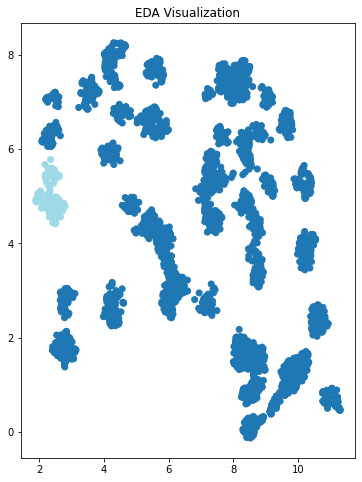

In [113]:
mask = hdb.labels_>=0
fig, ax = plt.subplots(1, 1, figsize=(6,8))
plt.scatter(sp_proj[:, 0][mask], sp_proj[:, 1][mask], c=hdb.labels_[mask]==clust_id, cmap="tab20")
plt.title("EDA Visualization")

## Sentiment

In [2]:
from import_casa import casa
from casa import Cadet

In [3]:
import re
import pandas as pd
import numpy as np
from transformers import BertForSequenceClassification, BertTokenizer
import torch

### Load cadet

In [4]:
cadet = Cadet.load(casa.get_data_path()/"cadet/op20")

[INFO] 2021-04-26 17:11:41,698 gensim.utils: loading KeyedVectors object from E:\LangOn\casa\data\cadet\op20\ft-2020.kv
[INFO] 2021-04-26 17:11:42,021 gensim.utils: setting ignored attribute vectors_norm to None
[INFO] 2021-04-26 17:11:42,022 gensim.utils: setting ignored attribute vectors_vocab_norm to None
[INFO] 2021-04-26 17:11:42,022 gensim.utils: setting ignored attribute vectors_ngrams_norm to None
[INFO] 2021-04-26 17:11:42,023 gensim.utils: setting ignored attribute buckets_word to None
[INFO] 2021-04-26 17:11:42,136 gensim.utils: FastTextKeyedVectors lifecycle event {'fname': 'E:\\LangOn\\casa\\data\\cadet\\op20\\ft-2020.kv', 'datetime': '2021-04-26T17:11:42.136710', 'gensim': '4.0.0', 'python': '3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020, 23:03:10) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18362-SP0', 'event': 'loaded'}
[WARNING] 2021-04-26 17:11:42,144 gensim.models.keyedvectors: destructive init_sims(replace=True) deprecated & no longer required for space-eff

### Load BERT model

In [6]:
ckpt_path = casa.get_data_path() / "cadence/bert-sentiment-50.02.1/model.ckpt"
model = BertForSequenceClassification.from_pretrained("bert-base-chinese", num_labels = 3)
model.load_state_dict(torch.load(ckpt_path))
tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

### Load sentiment constructicon

In [7]:
import pandas as pd
cx_path = casa.get_data_path() / "constructicon/sentiment-constructicon.csv"
cx_df = pd.read_csv(cx_path, index_col=None).dropna()
cx_list = cx_df.to_dict(orient='list')
cx_list = [(cx, score) for cx, score in zip(*cx_list.values())]

In [15]:
cadence = Cadence.build_Q2(cadet, model, tokenizer, cx_list)

In [16]:
cadence.analyze("中華在山上的訊號還不錯", summary=True)

'中華電信(0.94)/通訊品質(0.49)/Positive(0.91, Bert)'

In [32]:
cadence.analyze("只有遠傳沒有訊號", summary=True)

'遠傳電信(0.49)/通訊品質(0.96)/Negative(1.00, CxG)'

In [33]:
cadence.analyze("遠傳測速是在測心酸的", summary=False)

{'entity': ['中華電信', '台灣大哥大', '遠傳電信', '台灣之星', '亞太電信', '其他電信'],
 'entity_probs': array([0.01198956, 0.01227514, 0.94205485, 0.01115532, 0.01108392,
        0.01144121]),
 'service': ['資費方案', '通訊品質', '加值服務', '其他'],
 'service_probs': array([7.82737379e-05, 9.99760666e-01, 8.33699990e-05, 7.76904188e-05]),
 'seeds': ['測試', 'Speed', '測速', '上傳', '下載'],
 'seed_probs': array([0.95608653, 0.00644206, 0.00644206, 0.00644206, 0.00644206]),
 'sentiment': ['Neutral', 'Positive', 'Negative'],
 'sentiment_src': 'CxG',
 'sentiment_probs': array([0., 0., 1.], dtype=float32)}